# Linear and Non-Linear inductors
Author : **Ali Houshyar**

Contact : alihoshyarkhoshdell@mail.um.ac.ir

## What is inductor ?
An inductor, also called a coil, choke, or reactor, is a **passive** two-terminal electrical component that stores energy in a magnetic field when electric current flows through it. An inductor typically consists of an insulated wire wound into a coil.

When the current flowing through the coil changes, the time-varying magnetic field induces an electromotive force (emf) (voltage) in the conductor, described by Faraday's law of induction. According to Lenz's law, the induced voltage has a polarity (direction) which opposes the change in current that created it. As a result, inductors oppose any changes in current through them.

### Brief explanation about passive elements
A passive element is an electrical component that does not generate power, but instead dissipates, stores, and/or releases it. Passive elements include resistances, capacitors, and coils (also called inductors). These components are labeled in circuit diagrams as $R$, $C$ and $L$, respectively. In most circuits, they are connected to active elements

## Linear Inductors:
Linear inductors have a constant inductance value regardless of the current or frequency applied to them. 

## Time-variant and Time-invariant Linear Inductors : 
Linear induct ors can be classified into Time-variant and Time-invariant types based on how their Key Characteristics changes by time.

### Time-invariant Inductors:

By definition, characteristic curve of a time-invariant inductor have a relationship that can be expressed as :

$ Φ = Li(t) $

The voltage-current (V-I) relationship for a linear inductor follows the equation:

$ V = L\frac{di}{dt} $

where :

-	V is the voltage across the inductor.
-	I is the current through the inductor.
-	L is the inductance.
-	$ \frac{di}{dt} $ is the rate of change of current.

In a graph of voltage versus the rate of change of current, linear inductors produce a straight line with a slope equal to the inductance.

If Integrate both sides over $[0,t]$ interval : 

$ i(t) = i(0) + \frac{1}{L}\int_0^t v(t')dt' $ 

The integral in the above equation is the area under the curve . it is clear that i(t) is depends on i(0) and all Values of voltage over $[0,t]$ interval. Whis this we can assum that “inductors have memory” like capacitors.

we define a time-invariant inductor as a circuit element with two parameter :

- $i(0)$ : the current of inductor in $t=0$
- L : the inductance

#### Tevnan and Norton with inductors :

if we have time-invariant inductor with inductance of L and $i(0) = I_0$ then we can change the circuit into independent current sources with $I = I_0$ and a time-invariant inductor with inductance of L and $i(0) = 0$ which are parallel to each other.

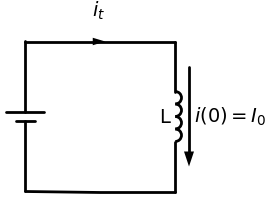

In [2]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d+=elm.Line().right()
    d+=elm.Arrowhead().at([1.6,0.0]).linewidth(4.0).label("$ i_t $")
    inc = elm.Inductor().down().label("L")
    d+=elm.Line().left()
    d+=elm.BatteryCell().up().reverse()
    d+=elm.CurrentLabel().at(inc).label("$i(0) = I_0$")

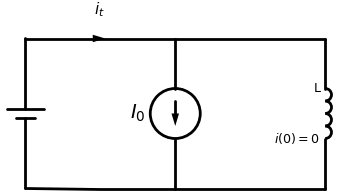

In [3]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d+=elm.Line().right()
    d+=elm.Arrowhead().at([1.6,0.0]).linewidth(4.0).label("$ i_t $",fontsize=11.1)
    Isrc=elm.SourceI().down().label("$I_0$")
    d+=elm.Line().right().at(Isrc.start)
    d+=elm.Inductor().down().label(["L","$i(0) = 0$"],fontsize=9.1)
    d+=elm.Line().left()
    d+=elm.Line().left()
    d+=elm.BatteryCell().up().reverse()

####  current can’t jump from a value to other incidentally in inductor:

If for all $t$ over the $[0,t]$ interval, The voltage on both sides of the inductor is bounded then current over the $[0,t]$ interval is continuous function. This means if voltage stay bounded on both side of inductor, current can’t jump from a value to other incidentally.

#### Linear inductors characteristic curve

We will use a simple circuit to analysis the linear inductor and define their characteristic curve using PySpice :

Two array named "voltage" and "current" will keep our values during the simulations. Then we have a for loop that goes from 0 to 5.1 with step of 0.1. in each loop we create a new simple circuit with source, resistor and inductor and run the simulation and append the values into the aaray that we defined. at the end, we show the curve using matplotlip.

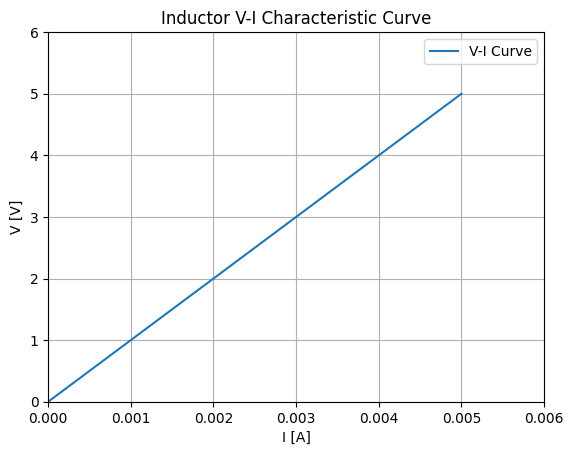

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PySpice
from PySpice.Spice.Netlist import Circuit

voltage = []
current = []
time_step = 1e-3 
stop_time = 0.5 
for v in np.arange(0, 5.1, 0.1):
    circuit = Circuit(f'circuit {v}')
    circuit.L(1, 'input', 'out', 10e-3)
    circuit.R(1, 'out', '0', 1e3)
    circuit.V(f'V{int(v*10)}', 'input', '0', v)
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=time_step, end_time=stop_time)
    sv = np.mean(analysis['out'][-int(0.1/time_step):])
    sc = sv / 1000
    voltage.append(v)
    current.append(sc)
plt.figure()
plt.plot(current, voltage, label='V-I Curve')
plt.title('Inductor V-I Characteristic Curve')
plt.xlabel('I [A]')
plt.ylabel('V [V]')
plt.grid()
plt.legend()
plt.xlim(0, 0.006)
plt.ylim(0, 6)
plt.show()


### Time-variant Inductors:

If inductor is linear but changes by time , characteristic curve of it in every second is straight line that passes from the origin and it slope is function of time

$ Φ = L(t)i(t) $

where $L(i)$ is specific function of time. With derivation of above equation we reach voltage equation that is : 

$ V(T) = L(t)\frac{di}{dt}\ + i(t)\frac{dL}{dt} $

## Non-Linear Inductors:

Inductors are fundamental components in electrical circuits that store energy in a magnetic field generated by the flow of electric current through their coils. The relationship between current ($I$), magnetic flux ($Φ$), and inductance ($L$) is traditionally linear and given by the equation $Φ = L⋅I$. However, real-world inductors often incorporate magnetic cores made of materials such as iron, which exhibit non-linear behavior due to magnetic saturation effects.

#### Brief explanation about Magnetic saturation
Magnetic saturation occurs when a material’s magnetic properties reach their limit, resulting in a plateau in the relationship between magnetic flux density ($B$) and magnetic field intensity ($H$). This phenomenon is critical in inductor design because it alters the inductance ($L$) as a function of current ($I$).

#### Saturation Effects:
In magnetic materials like iron, as the magnetic field intensity ($H$) increases, the magnetic flux density ($B$) initially rises linearly. However, beyond a certain point known as the saturation point, ($B$) ceases to increase linearly with ($H$) and begins to saturate. This saturation effect means that even if ($H$) continues to increase, ($B$) remains relatively constant or increases very slowly. Consequently, the inductance ($L$), which is typically calculated as the ratio of magnetic flux ($Φ$) to current ($I$), also shows non-linear behavior as it approaches and reaches saturation.

#### $Q$ factor
The winding resistance appears as a resistance in series with the inductor; it is referred to as DCR (DC resistance). This resistance dissipates some of the reactive energy. The quality factor (or $Q$) of an inductor is the ratio of its inductive reactance to its resistance at a given frequency, and is a measure of its efficiency. The higher the Q factor of the inductor, the closer it approaches the behavior of an ideal inductor. High $Q$ inductors are used with capacitors to make LC circuits in radio transmitters and receivers.

The Q factor of an inductor is defined as : 

$\huge Q = \frac{\omega L}{R} $

where $L$ is the inductance, $R$ is the DC resistance, and the product $ \omega L $ is the inductive reactance

#### Non-linear Model
To accurately model and simulate the behavior of inductors with non-linear magnetic cores, numerical methods are employed. The Python code provided below illustrates how to implement such a model and visualize its characteristics:

In [23]:
import numpy as np
import matplotlib.pyplot as plt

B_sat = 1.5
H_sat = 300
mu_0 = 4 * np.pi * 1e-7
N = 100
A_core = 1e-4
l_mag = 0.1
mu = 4.9754*10e-3

### Parameters explanation
These parameters define essential characteristics of the magnetic core and the physical dimensions of the inductor:
- **Saturation Flux Density (B_sat):** The maximum magnetic flux density the core material can sustain before saturation.
- **Saturation Magnetic Field Intensity (H_sat)**: The corresponding magnetic field intensity at which the core material saturates.
- **Permeability of Free Space (μ0):** The constant representing the magnetic permeability of free space.
- **Number of Turns (N):** The total number of wire turns in the inductor’s coil.
- **Cross-sectional Area of the Core (A_core):** The area through which the magnetic flux passes.
- **Magnetic Path Length (l_mag):** The distance along which the magnetic flux travels within the core.

In [3]:
def B(H):
    return B_sat * np.tanh(H / H_sat)

def H(I):
    return N * I / l_mag

def flux(I):
    return A_core * B(H(I))

def inductance(I):
    dI = 1e-5  # Small change in current for numerical differentiation
    dPhi = flux(I + dI) - flux(I)
    return dPhi / dI

### Functions explanation
- **B(H):** Computes the magnetic flux density ($B$) as a function of the magnetic field intensity ($H$), using the hyperbolic tangent function (np.tanh) to model saturation. This function determines how ($B$) changes with increasing ($H$) until saturation is reached. The formula of magnetic flux density ($B$) is
$$ B = \mu H $$
Where $ \mu $ is the permeability of the material (in Henrys per meter, H/m). But in real world, the relationship can become non-linear and may include saturation effects :
$$ B = B_{sat} * tanh(\frac{H}{H_{sat}}) $$
- **H(I):** Calculates the magnetic field intensity ($H$) based on the current ($I$), taking into account the number of turns N and the magnetic path length l_mag. This relationship indicates how the magnetic flux density varies with the current through the coil.
$$ H = N\frac{I}{I_{mag}} $$
- **flux(I):** Determines the magnetic flux ($Φ$) generated by the inductor for a given current ($I$). It combines the magnetic flux density ($B$) with the cross-sectional area A_core of the core.
$$ Φ = \int \vec{B}.d\vec{A} $$
- **inductance(I):** Numerically computes the inductance ($L$) by differentiating the magnetic flux ($Φ$) with respect to the current ($I$). This method captures the non-linear relationship between magnetic flux and current, crucial for understanding how inductance changes under varying operating conditions.

### Simulation and Visualization
The Python script simulates the behavior of the inductor across different current levels and visualizes several key relationships:

#### Flux vs Current:
Plots the magnetic flux Φ versus current I. As current increases, the flux also increases, but the rate of increase slows down due to magnetic saturation.

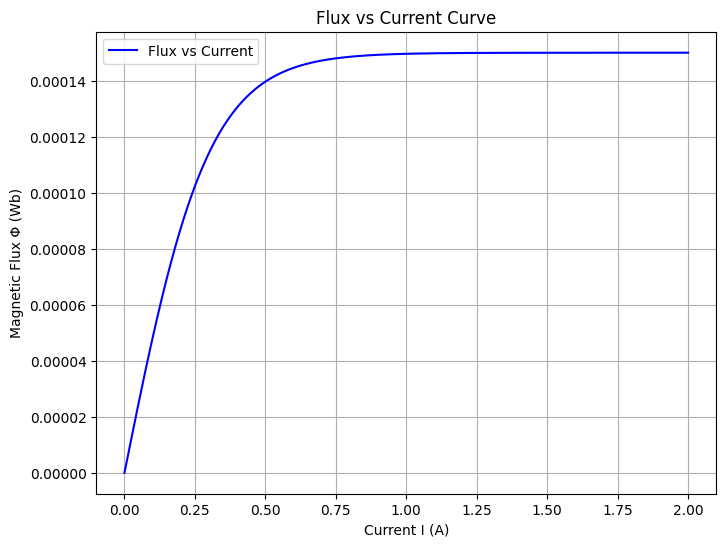

In [26]:
I_values = np.linspace(0, 2, 1000)
H_values = H(I_values)
B_values = B(H_values)
flux_values = flux(I_values)
L_values = np.array([inductance(I) for I in I_values])
plt.figure(figsize=(8, 6))
plt.plot(I_values, flux_values, label='Flux vs Current', color='b')
plt.title('Flux vs Current Curve')
plt.xlabel('Current I (A)')
plt.ylabel('Magnetic Flux Φ (Wb)')
plt.legend()
plt.grid(True)
plt.show()

#### Chart explanation
As current increases, the magnetic flux also increases. However, every inductor has a limit to how much magnetic flux it can handle before reaching saturation. When current saturate , the core material of the inductor can no longer linearly respond to increases in current due to magnetic domain alignment. So the curve have two part : **Linear Part** and **Saturation Part** 

- **Linear Part**: In the initial part of the current-flux curve, the relationship is linear. This means that as you increase the current, the flux increases proportionally.
- **Saturation Region**: Once you reach a certain level of current (the saturation current,  $ I_{sat} $), the inductor begins to saturate. Beyond this point, increases in current do not result in proportional increases in magnetic flux. The curve flattens out, indicating that additional current leads to minimal increases in flux.

We can see all above explanations in figure below : 

![Flux vs Current Curve](./img/curve1.JPG)

#### Inductance vs Current: 
Shows how inductance ($L$) varies with current ($I$). Initially, ($L$) increases linearly with ($I$), but it starts to saturate as the magnetic core reaches its limit.

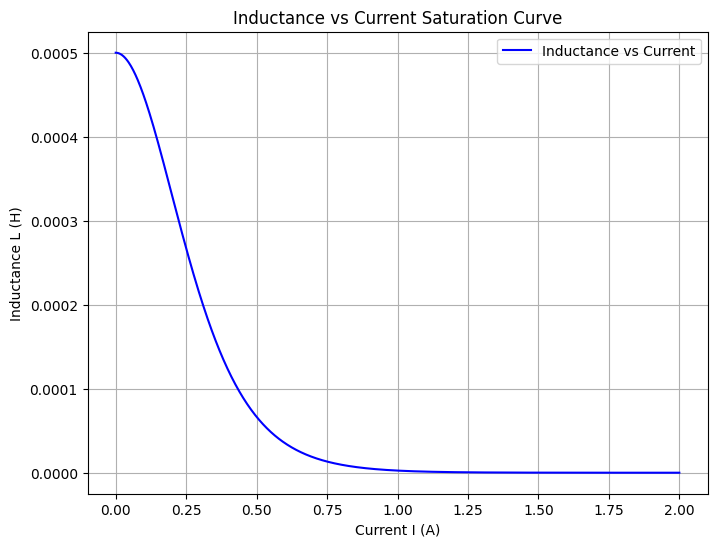

In [21]:
I_values = np.linspace(0, 2, 1000)
H_values = H(I_values)
B_values = B(H_values)
flux_values = flux(I_values)
L_values = np.array([inductance(I) for I in I_values])
plt.figure(figsize=(8, 6))
plt.plot(I_values, L_values, label='Inductance vs Current', color='b')
plt.title('Inductance vs Current Saturation Curve')
plt.xlabel('Current I (A)')
plt.ylabel('Inductance L (H)')
plt.legend()
plt.grid(True)
plt.show()

#### Chart explanation
Inductance (L) is a property of an electrical component (usually a coil or inductor) that quantifies its ability to store energy in a magnetic field when an electric current flows through it. So again the curve have two part : **Linear Part** and **Saturation Part** 

- **Linear Part**: At low currents, the inductor behaves linearly. This means that as you increase the current, the inductance decrease proportionally. In this part, the inductance ( $ L $ ) remains relatively constant, and the relationship can be described as a straight line on a graph of inductance ( $ L $ ) versus current ( $ I $ ).
- **Saturation Region**: Beyond the saturation point, the curve starts to flatten out. This means that increases in current produce only minimal increases in magnetic flux. In this part, the inductance effectively decreases because the core material is unable to store additional magnetic energy efficiently.

We can see all above explanations in figure below : 

![Inductance vs Current Saturation Curve](./img/curve2.JPG)

## Types of inductor
#### Air-core inductor:
The term air core coil describes an inductor that does not use a magnetic core made of a ferromagnetic material. The term refers to coils wound on plastic, ceramic, or other nonmagnetic forms, as well as those that have only air inside the windings. Air core coils have lower inductance than ferromagnetic core coils, but are often used at high frequencies because they are free from energy losses called core losses that occur in ferromagnetic cores, which increase with frequency

![Air-core inductor](./img/ind.PNG)

#### Iron Core Inductor:
The fixed value inductor in which an iron core is used within the coil to increase the inductance value of an inductor is known as an iron core inductor. These inductors have a very low inductance value and the iron core of this inductor has very unique magnetic characteristics which strengthen the magnetic field

![Iron Core Inductor](./img/ind2.PNG)

##### Benefits of Iron Core Inductor
- These inductors have fewer losses.
- Its size and construction are simple.
- This type of inductor has a high Q-factor.
- These inductors have a large inductance value.

#### Ferrite core inductor:
Inductors that are manufactured with a ferrite core inside their coil are Ferrite core inductor. When these solid metal cores are used in inductors, the changing magnetic field exhibits large eddy currents because of the electrical conductivity of the metal. These currents circulate within the inductors alongside the closed-loop of electric current.

![Ferrite core inductor](./img/ind3.PNG)

##### Benefits of Ferrite core inductor
- High inductance with low loss
- High permeability with temperature stability
- Operates at medium and high frequency
- Air gap adjustment controls various parameters
- Provides higher inductance and complete screening
- Q factor can be adjusted for appropriate frequency

#### Ferrite core inductor VS Iron Core Inductor
1. When there is a requirement for power or better current carrying capacity, iron core inductors make the best choice. The energy handling capacity of a ferrite core inductor will decrease as the flux density of the magnetic field rises, which can happen when load currents rise.
2. Iron core inductors may transfer more energy due to this factor, however, the Q factor may reduce. At higher frequencies, ferrite cores have a larger Q factor but are less efficient in transferring energy.
3. At high frequencies, iron core inductors have high magnetic losses and reach saturation easily whereas ferrites have fewer losses at high frequencies and also have resistance to saturation at higher frequencies.
4. Ferrite inductors are commonly used in applications like RF filters, high-frequency inductors, and power supplies that operate at high frequencies whereas iron core inductors are used in power transformers, audio equipment, and other low-frequency applications where inductance and current-carrying capability are primary concerns.

#### RF Inductors
RF inductors are the radio frequency inductors, which are used at high resonant frequencies. These can be multilayered coil inductor or a thin film coated ceramic inductor or some wire wound ceramic inductor. The following figure represents few RF inductors. These inductors are characterized by low current rating and high electrical resistance. But as the high frequencies are used here, the wire resistance increases

![RF Inductors](./img/ind4.PNG)

## Inductor applications
### Tuning Circuits
Inductors are used in tuning circuits to select the desired frequency. In a tuned circuit, a capacitor is connected along with the inductor, either in parallel or series. The frequency of the tuning circuit at which the capacitive reactance is equal to the inductive reactance ($X_C = X_L$) is called ‘Resonant Frequency’. Electronic devices such as radio tuning circuits and television use capacitors along with the inductor to modify the frequency and select within multiple channels of frequency.

### Sensors
Inductive proximity sensors are very reliable in operation and are a contactless sensor. An inductive sensor is a non-contact type of sensor, helpful in the detection of metallic objects. It can sense ferrous as well as non-ferrous materials. The sensing range is up to 100 mm.

![Sensors](./img/ind5.PNG)

This type of sensor, due to its internal structure, has a certain inductive sensor working principle. It uses a unique generator that produces a certain amplitude of oscillation. When an object consisting of a metallic or ferromagnetic material enters the field of action of the unit, the vibrations begin to change, which indicates the presence of an object. Because of this, the sensors work only with similar materials and are useless in other cases.inductive sensor works for

When starting work, the limit switch is energized, which contributes to the formation of a magnetic field. It is it that affects the eddy currents, which, in turn, change the amplitude of the oscillations of a working generator.

The result of all these transformations is an output signal, which can vary depending on the distance between the working sensor and the object under study. Then, using a special device, the analog signal is converted into a logical one.

![Sensors2](./img/sensor.JPG)

### Energy Storage
Inductors can store energy for a small period of time because the energy which is being stored as a magnetic field will be gone when the power supply is removed. The energy stored in an inductor is due to the magnetic field created by the current flowing through it. As the current through the inductor changes, the magnetic field also changes, and energy is either stored or released.

### Induction Motors
In induction motors, the shaft in the motor will rotate due to the presence of the magnetic field produced due to alternating current. An induction motor works by using electromagnets to create a rotating magnetic field. This field then induces an electric current in the rotor, which creates its own magnetic field. The interaction between the two fields causes the rotor to turn, effectively rotating around the motor.

![Induction Motors](./img/ind6.PNG)

### Transformers
A combination of multiple inductors with a shared magnetic field can be designed into a transformer. Transformers do not rely on the inductive properties of an electric circuit to transfer energy. Instead, they use magnetic induction, making them more efficient and allowing them to transfer higher voltages with less loss.

![Transformers](./img/ind7.PNG)

### Filters
Inductors when combined with capacitors will be used as filters. LC filters refer to circuits consisting of a combination of inductors (L) and capacitors © to cut or pass specific frequency bands of an electric signal. Capacitors block DC currents but pass AC more easily at higher frequencies. Conversely, inductors pass DC currents as they are, but pass AC less easily at higher frequencies.

![Filters](./img/ind8.PNG)

#### Basic Types of Inductive Filters
#### Low-Pass Filters
Low-pass filters are filter circuits that pass DC and low-frequency signals and cut high-frequency signals. They are the most widely used filter circuits and are mainly used to cut high-frequency noise. In audio, they are also used to cut treble/mid-range sound components of bass speakers.

![Low-Pass Filters](./img/fig1.JPG)

#### High-pass Filters
High-pass filters are filter circuits that cut DC and low-frequency signals and pass high-frequency signals. They are used to cut low-frequency noise in the audible range, cut mid-range/bass sound components of treble speakers, etc.

![High-pass Filters](./img/fig2.JPG)

#### Band-pass Filters
Band-pass filters are filter circuits that pass only signals at a specific frequency and cut signals at other frequencies. They are used for radio tuning (frequency adjustment) or for cutting the bass/treble sound components of mid-range speakers, etc.

![Band-pass Filters](./img/fig3.JPG)

### Chokes
Choke is an inductor used to block higher-frequency alternating currents (AC) while passing direct current (DC) and lower-frequency ACs in a circuit. A choke usually consists of a coil of insulated wire often wound on a magnetic core, although some consist of a doughnut-shaped ferrite bead strung on a wire. The choke's impedance increases with frequency. Its low electrical resistance passes both AC and DC with little power loss, but its reactance limits the amount of AC passed.

![Chokes](./img/ind9.PNG)

## Conclusion
So we learnthat an inductor, also known as a coil, choke, or reactor, is a passive electrical component that stores energy in a magnetic field when current passes through it and types of it.

## Refrences
- Renesas : https://www.renesas.com/en/support/engineer-school/electronic-circuits-01-passive-elements
- Medium : https://medium.com/@karishmaagarwal2505/modeling-inductors-non-linear-model-for-circuit-analysis-b3dd61b8ab68
- Elprocus : https://www.elprocus.com/iron-core-inductor/
- Alliedcomponents : https://www.alliedcomponents.com/blog/ferrite-core-inductors
- eepower : https://eepower.com/technical-articles/introduction-to-inductor-filter-types-and-applications/#
- wikipedia : https://en.wikipedia.org/wiki/Choke_(electronics)
- https://www.youtube.com/watch?v=gJYiOetl7sM
- https://www.youtube.com/watch?v=e26A3-V19Nw
- Engineering Electromagnetics. John Buck and William H. Hayt